In [1]:
# for data wrangling
import pandas as pd
from pandas import json_normalize

# for stats
import numpy as np
import statistics
import math
from scipy.stats import pearsonr, f_oneway, tukey_hsd

# for visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# for regex
import re

#### Main Experiment

In [2]:
data = pd.read_csv('topics-post-RADAR-data.csv')

In [3]:
data.columns 

Index(['id', 'File', 'Topic', 'Student', 'Student_Reformatted',
       'Grammarly_Score', 'STUD_Grammarly_Red', 'STUD_Grammarly_All',
       'ChatGPT-3', 'ChatGPT-4', 'GPT-4_Paraphrasing.io',
       'GPT-4_Paraphrasing.io_MANUALLYCORRECTED', 'GPT-4_Quillbot',
       'GPT-4_Grammarly', 'GPT-4_WordAi', 'STUD_sent_count', 'GPT3_sent_count',
       'GPT4_sent_count', 'STUD_word_count', 'GPT3_word_count',
       'GPT4_word_count', 'STUD_RADAR', 'STUD_REFORMATTED', 'STUD_RED_RADAR',
       'STUD_ALL_RADAR', 'GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR',
       'GPT4_Grammarly_RADAR', 'GPT4_WordAI_RADAR',
       'GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR'],
      dtype='object')

In [4]:
columns_to_keep = ['STUD_RADAR', 'STUD_REFORMATTED', 'STUD_RED_RADAR',
       'STUD_ALL_RADAR', 'GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR','GPT4_Grammarly_RADAR', 'GPT4_WordAI_RADAR',
       'GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR']

melted_data = data[columns_to_keep]

melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')

In [5]:
melted_data.head(10)

,Category,RADAR_output
0,STUD_RADAR,0.570650
1,STUD_RADAR,0.132299
2,STUD_RADAR,0.138674
3,STUD_RADAR,0.126367
4,STUD_RADAR,0.666776
5,STUD_RADAR,0.950133
6,STUD_RADAR,0.113861
7,STUD_RADAR,0.713035
8,STUD_RADAR,0.020142
9,STUD_RADAR,0.020966


/tmp/ipykernel_1086/296381137.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xticklabels=['Human', 'Reformatted','Gramm. Red','Gramm. All','GPT3', 'GPT4', 'Quillbot', 'Grammarly', 'WordAI', 'Para Raw', 'Para Edited'])


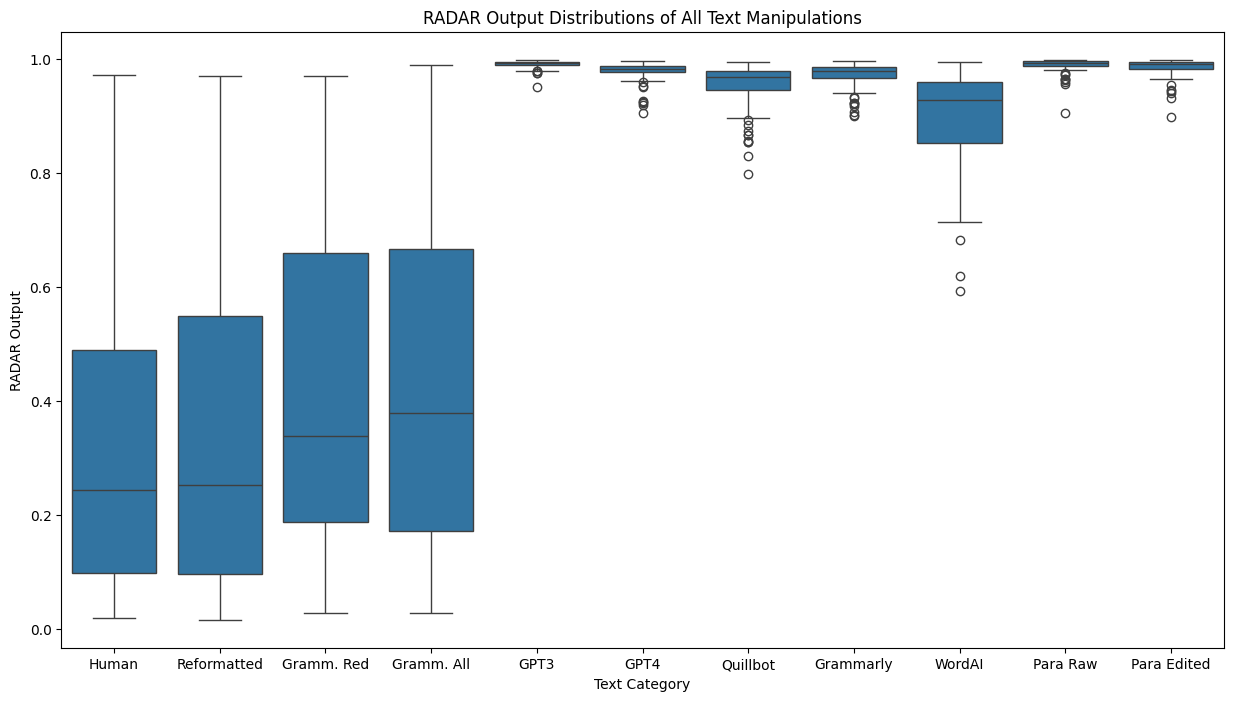

In [6]:
plt.figure(figsize=(15, 8)) 
g = sns.boxplot(data=melted_data, y='RADAR_output', x='Category')
# plt.xticks(rotation=90)
plt.title('RADAR Output Distributions of All Text Manipulations')
plt.ylabel('RADAR Output')
plt.xlabel('Text Category')
g.set(xticklabels=['Human', 'Reformatted','Gramm. Red','Gramm. All','GPT3', 'GPT4', 'Quillbot', 'Grammarly', 'WordAI', 'Para Raw', 'Para Edited']) 
plt.show()

/tmp/ipykernel_1086/3730196502.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(yticklabels=['Human', 'Reformatted','Gramm. Red','Gramm. All','GPT3', 'GPT4', 'Quillbot', 'Grammarly', 'WordAI', 'Para Raw', 'Para Edited'])


Text(0, 0.5, 'Text Category')

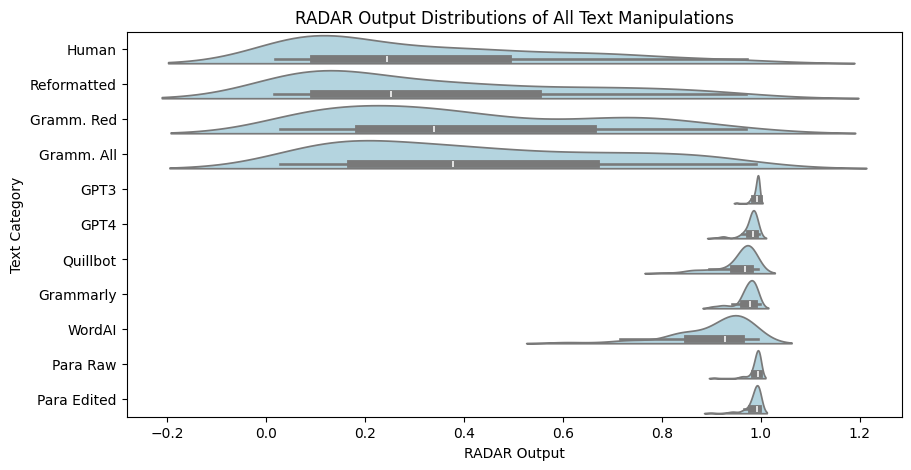

In [7]:
plt.figure(figsize=(10, 5)) 
ax = sns.violinplot(data=melted_data, x='RADAR_output', y='Category', density_norm='count', split=True, orient='h', color='LightBlue')
ax.set(yticklabels=['Human', 'Reformatted','Gramm. Red','Gramm. All','GPT3', 'GPT4', 'Quillbot', 'Grammarly', 'WordAI', 'Para Raw', 'Para Edited']) 
plt.title('RADAR Output Distributions of All Text Manipulations')
plt.xlabel('RADAR Output')
plt.ylabel('Text Category')

In [8]:
# Perform ANOVA
f_oneway(data['STUD_RADAR'], data['STUD_REFORMATTED'], data['STUD_RED_RADAR'],
             data['STUD_ALL_RADAR'],  data['GPT3_RADAR'],  data['GPT4_RADAR'],  data['GPT4_Paraphrasing_IO_RAW_RADAR'],
              data['GPT4_Paraphrasing_IO_EDITED_RADAR'],  data['GPT4_Quillbot_RADAR'],
               data['GPT4_Grammarly_RADAR'],  data['GPT4_WordAI_RADAR'])

F_onewayResult(statistic=290.3044880791682, pvalue=1.0641432057971168e-284)

In [9]:
# Perform Follow Up Tukey Tests
res = tukey_hsd(data['STUD_RADAR'], data['STUD_REFORMATTED'], data['STUD_RED_RADAR'],
             data['STUD_ALL_RADAR'],  data['GPT3_RADAR'],  data['GPT4_RADAR'],  data['GPT4_Paraphrasing_IO_RAW_RADAR'],
              data['GPT4_Paraphrasing_IO_EDITED_RADAR'],  data['GPT4_Quillbot_RADAR'],
               data['GPT4_Grammarly_RADAR'],  data['GPT4_WordAI_RADAR'])
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.022     0.999    -0.102     0.059
 (0 - 2)     -0.084     0.033    -0.164    -0.003
 (0 - 3)     -0.101     0.003    -0.182    -0.021
 (0 - 4)     -0.666     0.000    -0.747    -0.586
 (0 - 5)     -0.654     0.000    -0.734    -0.573
 (0 - 6)     -0.665     0.000    -0.745    -0.584
 (0 - 7)     -0.661     0.000    -0.741    -0.580
 (0 - 8)     -0.628     0.000    -0.709    -0.548
 (0 - 9)     -0.647     0.000    -0.728    -0.567
 (0 - 10)     -0.577     0.000    -0.657    -0.496
 (1 - 0)      0.022     0.999    -0.059     0.102
 (1 - 2)     -0.062     0.315    -0.142     0.018
 (1 - 3)     -0.079     0.056    -0.160     0.001
 (1 - 4)     -0.644     0.000    -0.725    -0.564
 (1 - 5)     -0.632     0.000    -0.712    -0.552
 (1 - 6)     -0.643     0.000    -0.723    -0.563
 (1 - 7)     -0.639     0.000    -0.719    -0.558
 (1 - 8)     -0.607     0.000  

#### Does Text Length Impact RADAR False Positive Rate?

In [10]:
text_length_RADAR = pd.read_csv('topics-length-specific-RADAR.csv')

In [11]:
text_length_RADAR.head(4)

,text_id,pre_processed_text,paragraph_id,word_count,RADAR_outputs
0,0,It is always said that competition can effecti...,0,84,0.996356
1,0,It is always said that competition can effecti...,1,189,0.983723
2,0,It is always said that competition can effecti...,2,333,0.848712
3,0,It is always said that competition can effecti...,3,369,0.570650


/tmp/ipykernel_1086/255995592.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set(xticklabels=[x for x in range(1,12)])


Text(0, 0.5, 'RADAR Output Distribution')

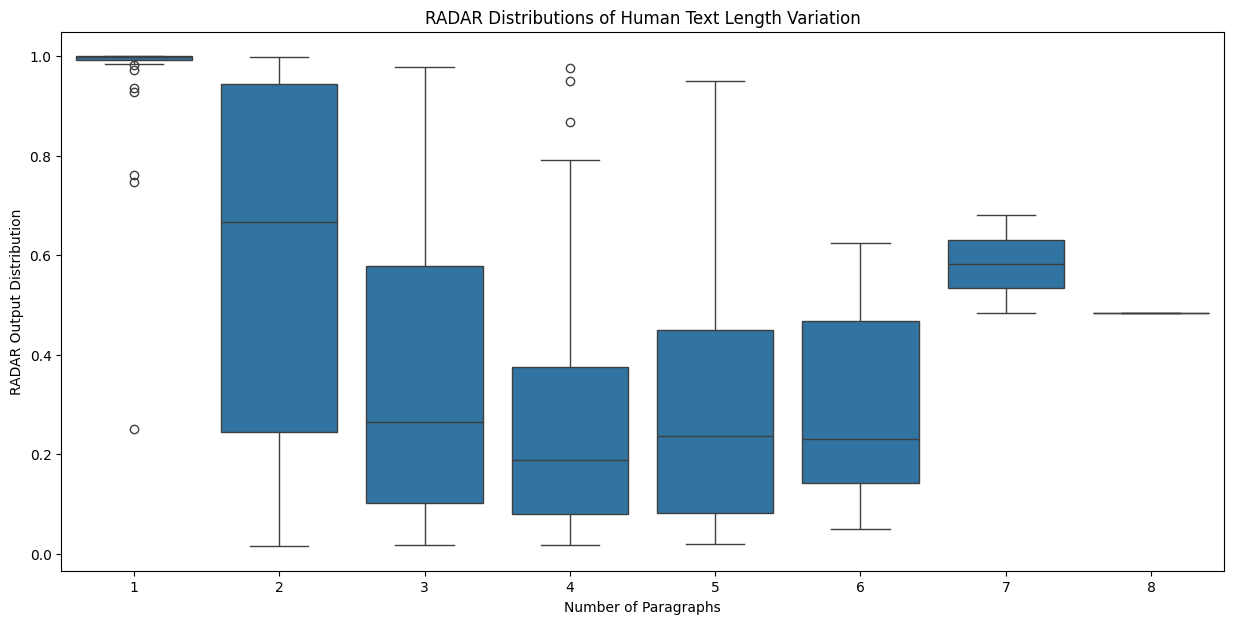

In [12]:
plt.figure(figsize=(15, 7)) 
f = sns.boxplot(data=text_length_RADAR, y='RADAR_outputs', x='paragraph_id')
plt.xlim(-0.5,7.5)
f.set(xticklabels=[x for x in range(1,12)]) 
plt.title('RADAR Distributions of Human Text Length Variation')
plt.xlabel('Number of Paragraphs')
plt.ylabel('RADAR Output Distribution')

Text(0, 0.5, 'RADAR Output')

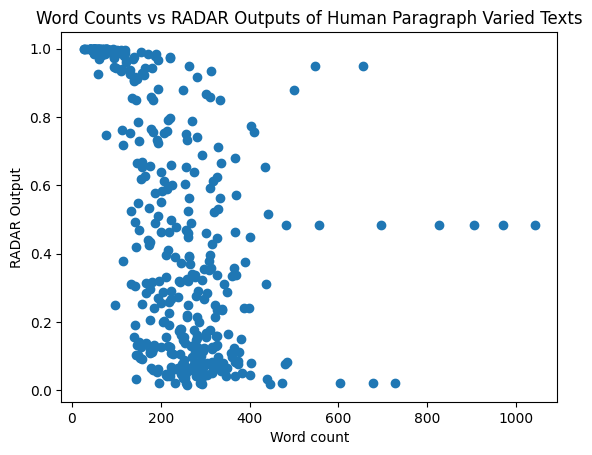

In [17]:
plt.scatter(x=text_length_RADAR['word_count'], y=text_length_RADAR['RADAR_outputs'])
plt.title('Word Counts vs RADAR Outputs of Human Paragraph Varied Texts')
plt.xlabel('Word count')
plt.ylabel('RADAR Output')

In [14]:
# Perform Pearson correlation test
corr_coeff, p_value = pearsonr(text_length_RADAR['word_count'], 
                               text_length_RADAR['RADAR_outputs'])

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Pearson correlation coefficient: -0.5404030537642682
p-value: 3.835439625898414e-33


In [22]:
text_sources = ['STUD_word_count', 'GPT3_word_count','GPT4_word_count']

text_lengths = data[text_sources]

text_lengths = pd.melt(text_lengths)

text_lengths

,variable,value
0,STUD_word_count,367
1,STUD_word_count,323
2,STUD_word_count,251
3,STUD_word_count,279
4,STUD_word_count,258
...,...,...
265,GPT4_word_count,250
266,GPT4_word_count,262
267,GPT4_word_count,275
268,GPT4_word_count,245


<Axes: xlabel='variable', ylabel='value'>

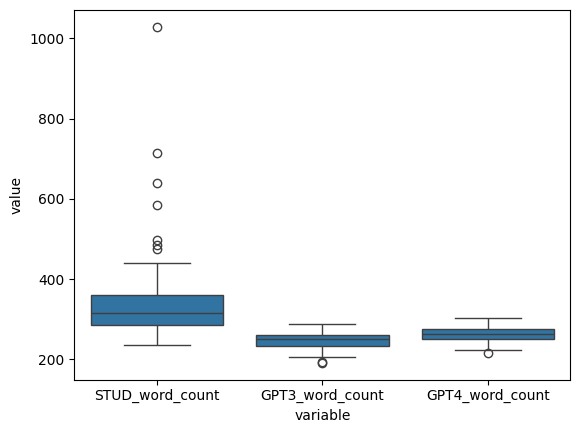

In [25]:
sns.boxplot(data=text_lengths, x='variable', y='value')

In [27]:
f_oneway(data['STUD_word_count'], data['GPT3_word_count'], data['GPT4_word_count'])

F_onewayResult(statistic=50.75745132832277, pvalue=2.0773205014630515e-19)

In [30]:
res = tukey_hsd(data['STUD_word_count'], data['GPT3_word_count'], data['GPT4_word_count'])
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     91.178     0.000    68.261   114.094
 (0 - 2)     76.622     0.000    53.706    99.539
 (1 - 0)    -91.178     0.000  -114.094   -68.261
 (1 - 2)    -14.556     0.294   -37.472     8.361
 (2 - 0)    -76.622     0.000   -99.539   -53.706
 (2 - 1)     14.556     0.294    -8.361    37.472



In [45]:
length_correlation_check = ['STUD_RADAR', 'GPT3_RADAR', 'GPT4_RADAR', 'STUD_word_count', 'GPT3_word_count', 'GPT4_word_count']
length_correlation_check = data[length_correlation_check]

df_x = pd.melt(length_correlation_check, id_vars=[], value_vars=['STUD_word_count', 'GPT3_word_count', 'GPT4_word_count'], var_name='x_var', value_name='x_value')
df_y = pd.melt(length_correlation_check, id_vars=[], value_vars=['STUD_RADAR', 'GPT3_RADAR', 'GPT4_RADAR'], var_name='y_var', value_name='y_value')

df_melted = pd.concat([df_x.reset_index(drop=True), df_y.reset_index(drop=True)], axis=1)
df_melted

,x_var,x_value,y_var,y_value
0,STUD_word_count,367,STUD_RADAR,0.570650
1,STUD_word_count,323,STUD_RADAR,0.132299
2,STUD_word_count,251,STUD_RADAR,0.138674
3,STUD_word_count,279,STUD_RADAR,0.126367
4,STUD_word_count,258,STUD_RADAR,0.666776
...,...,...,...,...
265,GPT4_word_count,250,GPT4_RADAR,0.983242
266,GPT4_word_count,262,GPT4_RADAR,0.979722
267,GPT4_word_count,275,GPT4_RADAR,0.983915
268,GPT4_word_count,245,GPT4_RADAR,0.980860


<Axes: xlabel='x_value', ylabel='y_value'>

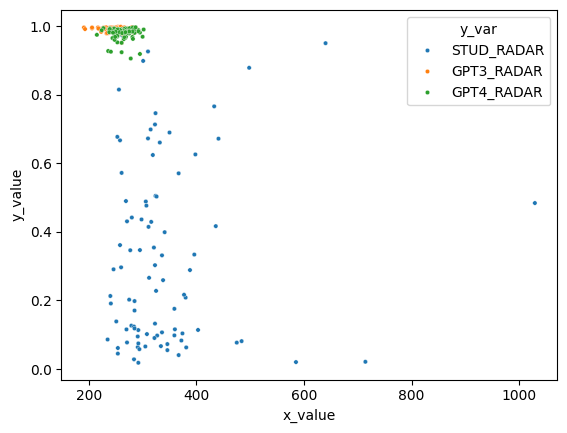

In [50]:
sns.scatterplot(data=df_melted, x='x_value', y='y_value', hue='y_var', s=10)

In [51]:
# Perform Pearson correlation test
corr_coeff, p_value = pearsonr(data['GPT4_word_count'], 
                               data['GPT4_RADAR'])

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Pearson correlation coefficient: 0.018505013389689805
p-value: 0.8625611928121127


<Axes: xlabel='GPT4_word_count', ylabel='GPT4_RADAR'>

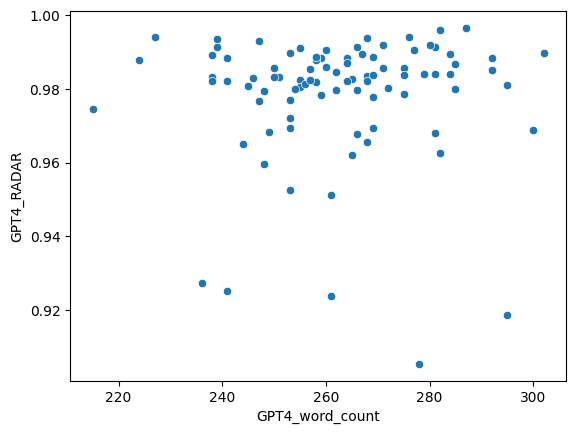

In [52]:
sns.scatterplot(data=data, x='GPT4_word_count', y='GPT4_RADAR')

#### Weber Wulff Accuracy

In [15]:
print(data['Student'][0])

It is always said that competition can effectively promote the development of economy. In order to survive in the competition, companies continue to improve their products and service, and as a result, the whole society prospers. However, when we discuss the issue of competition or cooperation, what we are concerned about is not the whole society, but the development of an individual's whole life. From this point of view, I firmly believe that we should attach more importance to cooperation during primary education.
 First of all, through cooperation, children can learn about interpersonal skills which are significant in the future life of all students. What we acquired from team work is not only how to achieve the same goal with others but more importantly, how to get along with others. During the process of cooperation, children can learn about how to listen to opinions of others, how to communicate with others, how to think comprehensively, and even how to compromise with other team

In [16]:
print(data['Student_Reformatted'][0])

It is always said that competition can effectively promote the development of economy. In order to survive in the competition, companies continue to improve their products and service, and as a result, the whole society prospers. However, when we discuss the issue of competition or cooperation, what we are concerned about is not the whole society, but the development of an individual's whole life. From this point of view, I firmly believe that we should attach more importance to cooperation during primary education.

First of all, through cooperation, children can learn about interpersonal skills which are significant in the future life of all students. What we acquired from team work is not only how to achieve the same goal with others but more importantly, how to get along with others. During the process of cooperation, children can learn about how to listen to opinions of others, how to communicate with others, how to think comprehensively, and even how to compromise with other team